In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, e
import math


## Back Propogation only for last bias which is b3

## only for 1 variable

Example would be same as previous

NN fits squiggle to the dataset

using the chain rule to get derivative

plugin derivatives into gradient decent to get optimized parameters

## backpropogation
theoretically it starts with last parameters and works its way backwords to estimate all of other parameters


Assume all parameters are optimal except last one


assume 0 for low dosage and 1 for high

Here we will find last bias term b3


In [ ]:
w1 = 3.34
b1 = -1.43

w2 = -3.53
b2 = 0.57

w3 = -1.22
w4 = -2.30-
# b3 = ?

# Top node
def connection(input):
  return (input*w1)+b1

def sfActiv(x):
  return log(1+e**x) ## soft plus function


# Bottom node
def connection2(input):
  return (input*w2)+b2

def sfActiv2(x):
  return log(1+e**x) ## soft plus function

In [ ]:
inputs = np.linspace(0,1,10)
# inputs = [0,0.5,1]
inputs

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
actual = [0,0,0,0,1,1,1,0,0,0]
# actual=[0,1,0]

In [ ]:
y_activation_node1 = [sfActiv(connection(i)) for i in inputs]
y_activation_node1

[0.21455390348483222,
 0.29776183193706773,
 0.40725811433148507,
 0.5472965438424601,
 0.7207398817197178,
 0.9283933698854532,
 1.1688019398992722,
 1.438611774495584,
 1.7333196944227007,
 2.0480913186126464]

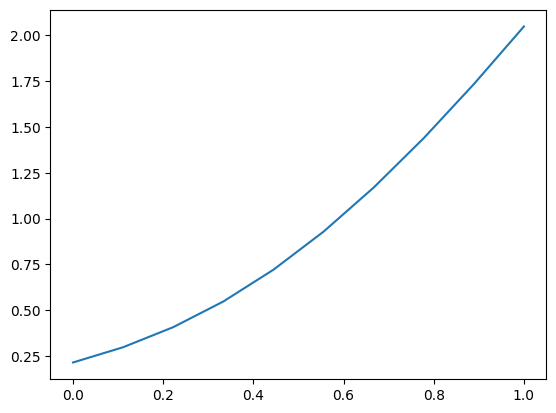

In [ ]:
plt.plot(inputs, y_activation_node1)

In [ ]:
scale_node1 = [i*w3 for i in y_activation_node1]
scale_node1

[-0.2617557622514953,
 -0.3632694349632226,
 -0.49685489948441175,
 -0.6677017834878013,
 -0.8793026556980557,
 -1.1326399112602528,
 -1.425938366677112,
 -1.7551063648846124,
 -2.1146500271956947,
 -2.4986714087074287]

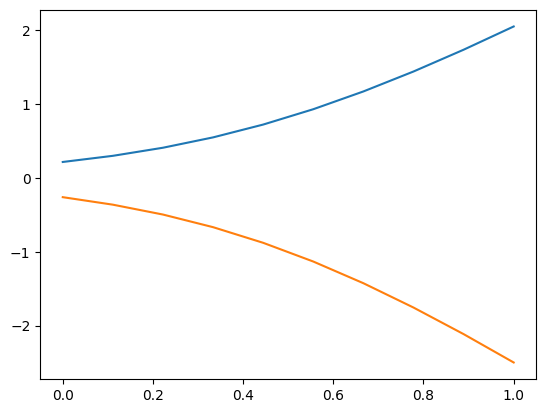

In [ ]:
plt.plot(inputs, y_activation_node1)
plt.plot(inputs, scale_node1)

### Node 2

In [ ]:
y_activation_node2 = [sfActiv2(connection2(i)) for i in inputs]
y_activation_node2

[1.0182215112208328,
 0.7859814952091445,
 0.5916622801296529,
 0.43513073999003854,
 0.3135606327059059,
 0.22218205561448853,
 0.15535876917866828,
 0.10754866990405468,
 0.07390620722168675,
 0.0505209675340217]

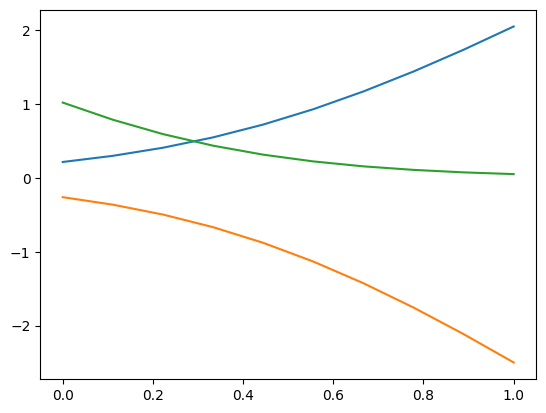

In [ ]:
plt.plot(inputs, y_activation_node1)
plt.plot(inputs, scale_node1)
plt.plot(inputs, y_activation_node2)

In [ ]:
scale_node2 = [i*w4 for i in y_activation_node2]
scale_node2

[-2.341909475807915,
 -1.8077574389810322,
 -1.3608232442982016,
 -1.0008007019770886,
 -0.7211894552235835,
 -0.5110187279133236,
 -0.35732516911093704,
 -0.24736194077932575,
 -0.16998427660987953,
 -0.1161982253282499]

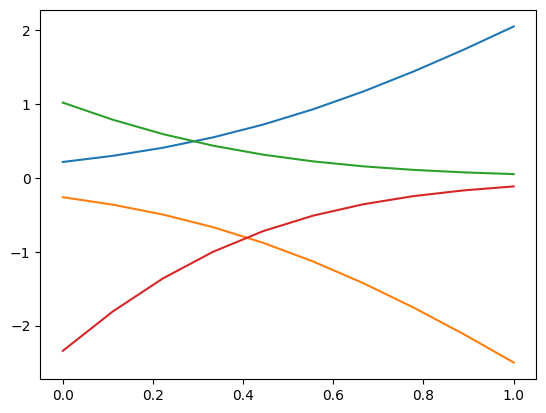

In [ ]:
plt.plot(inputs, y_activation_node1)
plt.plot(inputs, scale_node1)
plt.plot(inputs, y_activation_node2)
plt.plot(inputs, scale_node2)

## final sum both top and bottom node y-axis vals


In [ ]:
sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]
sum_both_y

[-2.6036652380594103,
 -2.171026873944255,
 -1.8576781437826133,
 -1.6685024854648898,
 -1.600492110921639,
 -1.6436586391735764,
 -1.7832635357880489,
 -2.002468305663938,
 -2.284634303805574,
 -2.6148696340356787]

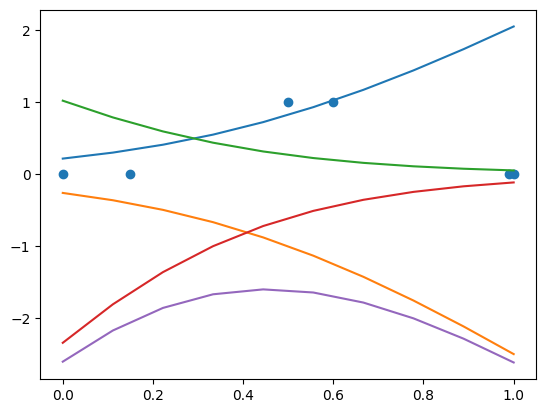

In [ ]:
plt.plot(inputs, y_activation_node1)
plt.plot(inputs, scale_node1)
plt.plot(inputs, y_activation_node2)
plt.plot(inputs, scale_node2)
plt.plot(inputs, sum_both_y)
plt.scatter([0.0,0.15,0.5,0.6,0.99,1],[0,0,1,1,0,0])

#final adding bias

as we dont have optimal bias we will start from 0

But adding 0 to all y-cordinates will leaves it right where it is

Althogh the squiggle is far from the data points of ours


In [ ]:
b3 = 0

using loss function as SSR (Sum of the Squred Residule)

below is the representation of the SSR with respect to bias3 (b3)

try 0 to 3 values


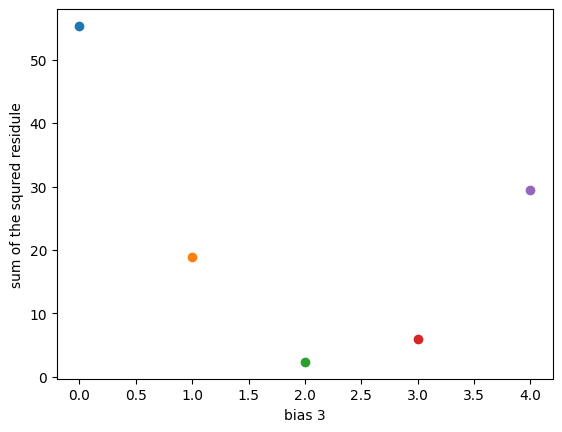

In [ ]:
# for ssr
for i in range(0,5):
  # add bias which is i
  final_op = [sum_both_y[l]+i for l in range(0,len(sum_both_y))]

  ## calculate ssr
  squred_res = [(actual[p]-final_op[p])**2 for p in range(0,len(final_op))]
  ssr_val = sum(squred_res)
  plt.scatter(i,ssr_val)
  plt.xlabel("bias 3")
  plt.ylabel("sum of the squred residule")


lowest ssr is = 2 and vice versa

now see squiggle

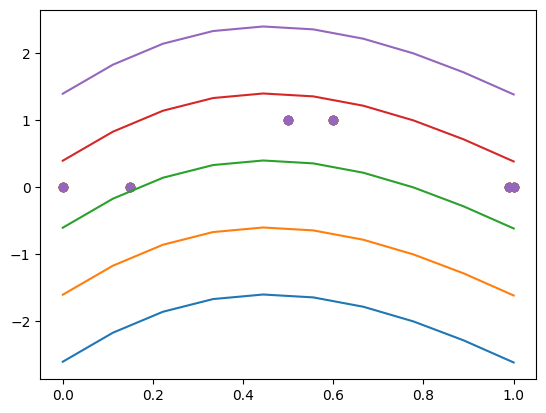

In [ ]:
for i in range(0,5):
  # add bias which is i
  final_op = [sum_both_y[l]+i for l in range(0,len(sum_both_y))]
  plt.plot(inputs, final_op)
  plt.scatter([0.0,0.15,0.5,0.6,0.99,1],[0,0,1,1,0,0])

#### Instead of adding manually lots of the values we can gredient decent to find optimal value and quickly

And for that we have to find derivative of `SSR` with respect to `b3`

$$ SSR = \sum_{k=1}^n (actual-predicted)^2 $$

n = size of inputs


$$ simplified_SSR = \sum_{k=1}^n (actual-(y \; of \; bottom \; node+y \; of \; top \; node+bias3))^2 $$



To get derivative of `ssr` wrt `b3` we can use `The Chain Rule`

---
$$ predicted \; values =  y \; of \; bottom \; node+y \; of \; top \; node+bias3 $$

---

$$ \frac{d \; SSR}{b3} = \frac{d \; SSR}{predicted \; values} * \frac{d \; predicted \; values}{b3} $$

> 💡 Note: For derivative using chain rule first take derivative of outer functino (inside) and multiply it with derivative of inside. In our case inside is **(actual - (y_of_bottom_node + y_of_top_node + bias3))** and outside function is ()**2


$$ \frac{d \; SSR}{b3} = \sum_{i=1}^n 2(actual-predicted)(-1)(1) $$

In [ ]:
def ssr_b3(actual, predicted):
  s_list = [ ((actual[i]-predicted[i])**2) for i in range(0,len(predicted))]
  ans = sum(s_list)
  return ans

def der_of_ssr_b3(actual, predicted):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(1)) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans

In [ ]:
# Initial value of b3 = 0
b3 = 0

learning_rate = 0.02

[-2.6036652380594103, -2.171026873944255, -1.8576781437826133, -1.6685024854648898, -1.600492110921639, -1.6436586391735764, -1.7832635357880489, -2.002468305663938, -2.284634303805574, -2.6148696340356787]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[-2.6036652380594103, -2.171026873944255, -1.8576781437826133, -1.6685024854648898, -1.600492110921639, -1.6436586391735764, -1.7832635357880489, -2.002468305663938, -2.284634303805574, -2.6148696340356787]
0
b3 =  0.929210370825585
der =  -46.46051854127925
------------
[-1.6744548672338253, -1.24181650311867, -0.9284677729570283, -0.7392921146393048, -0.671281740096054, -0.7144482683479914, -0.8540531649624639, -1.073257934838353, -1.355423932979989, -1.6856592632100937]
[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[-2.6036652380594103, -2.171026873944255, -1.8576781437826133, -1.6685024854648898, -1.600492110921639, -1.6436586391735764, -1.7832635357880489, -2.002468305663938, -2.284634303805574, -2.6148696340356787]
0.929210370825585
b3 =  1.486736593320936
der 

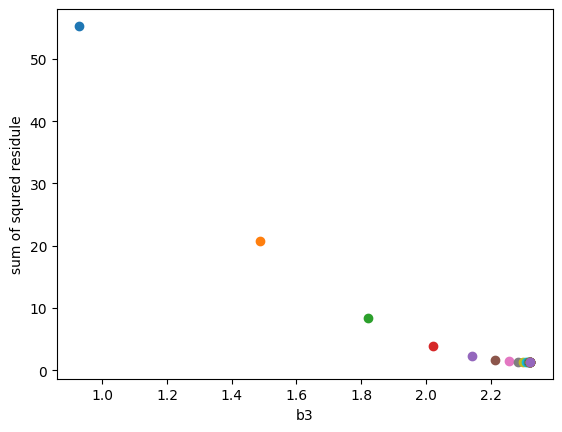

In [ ]:
for g in range(0,25):
  predicted = [sum_both_y[l]+b3 for l in range(0,len(sum_both_y))]
  print(predicted)
  print(actual)
  print(sum_both_y)
  print(b3)

  diraction_of_curve = der_of_ssr_b3(actual, predicted) # gives slope of curve
  ssr = ssr_b3(actual, predicted)

  ## Gradient decent
  step_size = diraction_of_curve*learning_rate # slope * learning rate
  b3 = b3-step_size   # old_value - step size

  print("b3 = ", b3)
  print("der = ", diraction_of_curve)
  print("------------")

  plt.scatter(b3, ssr)
  plt.xlabel("b3")
  plt.ylabel("sum of squred residule")

## 🎉 Found the Optimal b3 which is 2.63

[-0.28066523805941035, 0.15197312605574487, 0.46532185621738664, 0.6544975145351102, 0.7225078890783609, 0.6793413608264236, 0.5397364642119511, 0.3205316943360619, 0.03836569619442587, -0.2918696340356788]


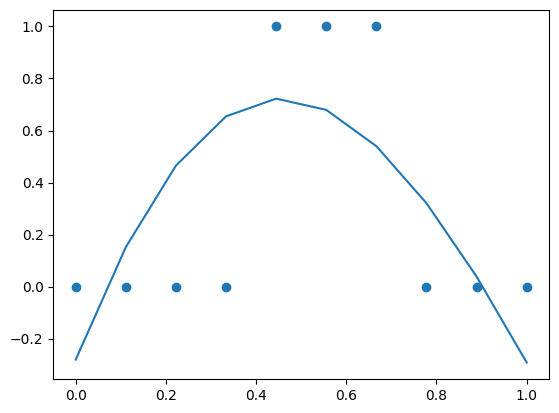

In [ ]:
final_op = [sum_both_y[l]+(2.323) for l in range(0,len(sum_both_y))]
plt.plot(inputs, final_op)
# plt.scatter([0.0,0.15,0.5,0.6,0.99,1],[0,0,1,1,0,0])
plt.scatter(inputs, actual)
print(final_op)

## Main Idea of Backpropogation

when parameters **Unknown** that is `b3` we use **The Chain Rule** to calculate `derivative of loss function` which is `sum of the squred residuls` with respect to unknown parameter, in this case `b3`

Then we initialize unknown parameter with a number, which is 0. b3 = 0

and used gradient decent to optimize unknown parameter.

# My Notes / key points

- As per above graph it has not acuratly found the optimal value
- Although It works on simple data which is given from video 3 points 0,1,0
- **Learning Rate**: changing it to `0.1` will make big jumps and `0.01` will take comparitively smaller steps.

# Optimizing 3 parameters

In above example we have all optimal parameters **except last bias** `b3`

There,
 first we calculated derivative of `ssr` using `the chain rule` with respect to unknown parameter `b3`

 We **initialize** `b3` with `0`. And used Gradient decent to optimize the parameter.

 ---


 Now, assume we don't know `b3`'s optimal value and work backwords so that along with `b3`, we optimize last two weights `w3` and `w4`.


 > 🎯 Goal: Learn  How `The Chain Rule` and `Gradient Decent` applies to multiple parameters

 And after this we will optimize all the parameters 🚀


 ## Begin

 Don't know optimal values: `w3`, `w4`, and `b3`

 Assuming Other waights and Biases are already optimized: `w1`, `w2`, `b1`, and `b2`

 ### 1st step
 ----
 Initialize weights  `w3` and `w4` with random starting value.

 For this ex randomly selecting 2 values from standard normal distribution

 And checkout how the squiggle looks.

 > ## TODO 🙋‍♂️  
 Later checkout Stand. Normal Dist. and how values are selected
 As of now taking values shown in video.





In [ ]:
# Inputs and actual outputs
# inputs = np.linspace(0,1,10)
inputs = [0,0.5,1]
print("inputs : ", inputs)

# actual = [0,0,0,0,1,1,1,0,0,0]
actual=[0,1,0]
print("Actual O/p : ", actual)


# Parameters

w1 = 3.34
b1 = -1.43

w2 = -3.53
b2 = 0.57

# Find optimal values of below parameters
# w3 = ?
# w4 = ?
# b3 = ?

## Initialize parameters
w3 = 0.36
w4 = 0.63
b3 = 0

# Top node
def connection(input):
  return (input*w1)+b1

def sfActiv(x):
  return log(1+e**x) ## soft plus function


# Bottom node
def connection2(input):
  return (input*w2)+b2

def sfActiv2(x):
  return log(1+e**x) ## soft plus function

inputs :  [0, 0.5, 1]
Actual O/p :  [0, 1, 0]


In [ ]:
y_activation_node1 = [sfActiv(connection(i)) for i in inputs]
scale_node1 = [i*w3 for i in y_activation_node1]

y_activation_node2 = [sfActiv2(connection2(i)) for i in inputs]
scale_node2 = [i*w4 for i in y_activation_node2]

sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]

final_op = [sum_both_y[l]+(b3) for l in range(0,len(sum_both_y))]

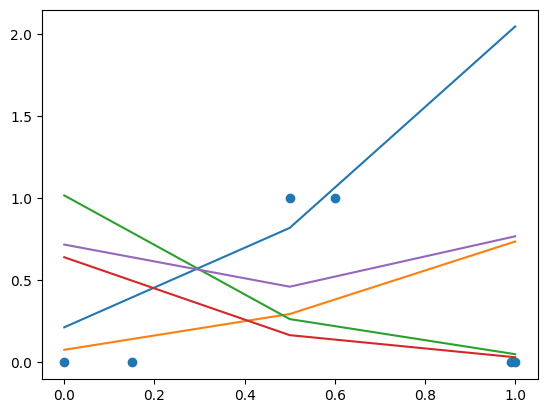

In [ ]:
plt.plot(inputs, y_activation_node1)
plt.plot(inputs, scale_node1)
plt.plot(inputs, y_activation_node2)
plt.plot(inputs, scale_node2)
plt.plot(inputs, sum_both_y)
plt.scatter([0.0,0.15,0.5,0.6,0.99,1],[0,0,1,1,0,0])

With non optimal last 3 parameters we get this purple squiggle

Since, b3 is 0 adding it to sum wont change the position of the squiggle

## Summary

with some optimal and non optimal parameters we get purple squiggle as shown in above figure.

-----

# Step 2
Now, We can `quantify how well purple squiggle fits data` by calculating `Sum of Squred Residules`

In [ ]:
def ssr_loss_f(actual, predicted):
  s_list = [ ((actual[i]-predicted[i])**2) for i in range(0,len(predicted))]
  ans = sum(s_list)
  return ans

In [ ]:
ssr1 = ssr_loss_f(actual, final_op)
ssr1

1.397667948265847

# ploting `ssr` wrt `b3`



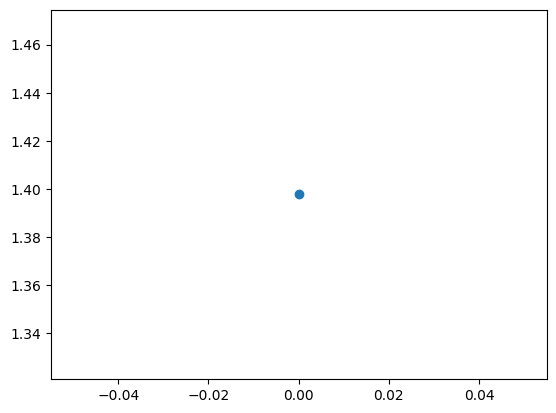

In [ ]:
plt.scatter(b3,ssr1)

> 💡 Changing `b3` will `change position of squiggle` and value of `SSR`.



[0, 1, 0]
[0.7187189573236643, 0.46191729151291083, 0.7691410842469864]
[0, 1, 0]
[0.6187189573236643, 0.36191729151291085, 0.6691410842469864]
[0, 1, 0]
[0.5187189573236644, 0.2619172915129108, 0.5691410842469864]
[0, 1, 0]
[0.2187189573236643, -0.03808270848708917, 0.26914108424698635]
[0, 1, 0]
[-0.2812810426763357, -0.5380827084870892, -0.23085891575301365]
[0, 1, 0]
[-0.7812810426763357, -1.0380827084870892, -0.7308589157530136]
[0, 1, 0]
[-1.2812810426763357, -1.5380827084870892, -1.2308589157530136]


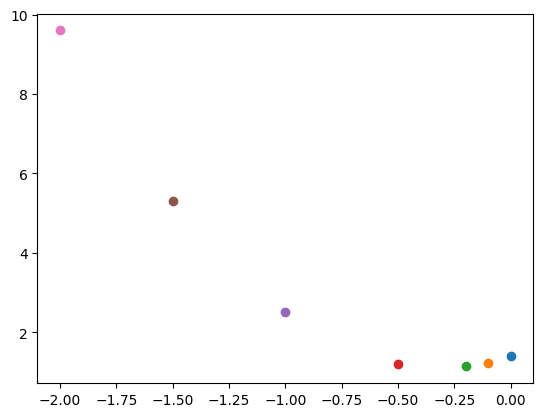

In [ ]:
for i in [0, -0.1,-0.2,-0.5,-1,-1.5,-2]:
  final_op = [sum_both_y[l]+(i) for l in range(0,len(sum_both_y))]
  ssr1 = ssr_loss_f(actual, final_op)
  print(actual)
  print(final_op)
  plt.scatter(i,ssr1)


[0, 1, 0]
[0.7187189573236643, 0.46191729151291083, 0.7691410842469864]
[0, 1, 0]
[0.6187189573236643, 0.36191729151291085, 0.6691410842469864]
[0, 1, 0]
[0.5187189573236644, 0.2619172915129108, 0.5691410842469864]
[0, 1, 0]
[0.2187189573236643, -0.03808270848708917, 0.26914108424698635]
[0, 1, 0]
[-0.2812810426763357, -0.5380827084870892, -0.23085891575301365]
[0, 1, 0]
[-0.7812810426763357, -1.0380827084870892, -0.7308589157530136]
[0, 1, 0]
[-1.2812810426763357, -1.5380827084870892, -1.2308589157530136]


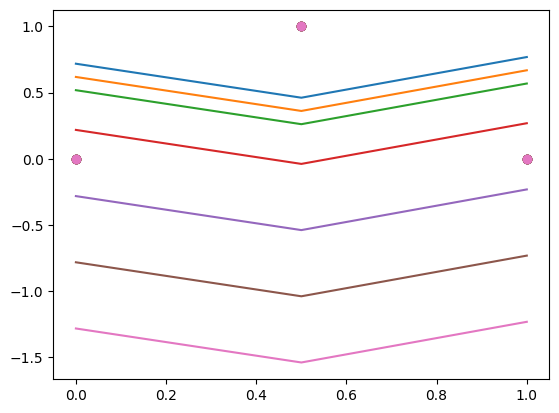

In [ ]:
for i in [0, -0.1,-0.2,-0.5,-1,-1.5,-2]:
  final_op = [sum_both_y[l]+(i) for l in range(0,len(sum_both_y))]
  ssr1 = ssr_loss_f(actual, final_op)
  print(actual)
  print(final_op)
  plt.plot(inputs,final_op)
  plt.scatter(inputs, actual)

It means **we can optimize** `b3` by `finding the derivative of SSR wrt b3`.

and giving derivative into gradient decent algorithm to find optimal value for `b3`

$$ SSR = \sum_{k=1}^n (actual-predicted)^2 $$

and predicted value equals the purple squiggle.

$$ predicted = purple \; squiggle $$

and predicted values = purple squiggle = y1 + y2 + b3

y1 = top node o/p

y2 = bottom node o/p

👉 That means `SSR` is linked with `b3` / dependent by predicted values

So by `The chain rule` derivative of `SSR` wrt `b3` is derivative of SSR with respect to predicted values times the derivative of the predicted values WRT b3

And we have already found it earlier. 👇

# -


$$ \frac{d \; SSR}{b3} = \frac{d \; SSR}{predicted \; values} * \frac{d \; predicted \; values}{b3} $$



---

> 💡 Point is the derivative we already calculated WRT SSR do not change

## Calculating Derivative of SSR WRT `w3` and `w4`

**For Top Node**

x1,i = input_i * w1 + b1

y1,i = f(x1,i) = log(1 + e^2)



**For Bottom Node**

x2,i = input_i * w2 + b2

y2,i = f(x2,i) = log(1 + e^2)

## derivative of ssr wrt w3, w4, and b3 👇

In [ ]:
# der_of_ssr_wrt_predicted_val = -2*(actual[i]-predicted[i])

def der_of_ssr_b3(actual, predicted):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(1)) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans


def der_of_ssr_w3(actual, predicted, y1):
  der_list = [ (-2*(actual[i]-predicted[i])*y1[i]) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans


def der_of_ssr_w4(actual, predicted, y2):
  der_list = [ (-2*(actual[i]-predicted[i])*y2[i]) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans

In [ ]:
print("Der of SSR WRT w3 with initial value")
final_op = [sum_both_y[l]+(b3) for l in range(0,len(sum_both_y))]

der_of_ssr_w3(actual, final_op, y_activation_node1)

Der of SSR WRT w3 with initial value


2.576139529882882

In [ ]:
print("Der of SSR WRT w4 with initial value")
final_op = [sum_both_y[l]+(b3) for l in range(0,len(sum_both_y))]

der_of_ssr_w4(actual, final_op, y_activation_node2)

Der of SSR WRT w4 with initial value


1.2567622996820282

## Okay! Apply Gradient Decent 🚀



In [ ]:
learning_rate = 0.130
## Initialize parameters
w3 = 0.36
w4 = 0.63
b3 = 0

In [ ]:
for g in range(0,176):
  old_b3 = b3
  old_w3 = w3
  old_w4 = w4

  ## This time we need this block calculating each time
  y_activation_node1 = [sfActiv(connection(i)) for i in inputs]
  scale_node1 = [i*w3 for i in y_activation_node1]

  y_activation_node2 = [sfActiv2(connection2(i)) for i in inputs]
  scale_node2 = [i*w4 for i in y_activation_node2]

  sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]

  predicted = [sum_both_y[l]+b3 for l in range(0,len(sum_both_y))]
  # print(predicted)
  # print(actual)
  # print(sum_both_y)
  # print(b3)

  # diraction_of_curve = der_of_ssr_b3(actual, predicted) # gives slope of curve
  # ssr = ssr_b3(actual, predicted)

  ## Gradient decent
  # step_size = diraction_of_curve*learning_rate # slope * learning rate
  # b3 = old_b3-step_size   # old_value - step size

  # w3
  d_w3 = round(der_of_ssr_w3(actual, predicted, y_activation_node1), 2) # derivative w3
  step_size_w3 = d_w3*learning_rate
  w3 = old_w3 - step_size_w3

  # w4
  d_w4 = round(der_of_ssr_w4(actual, predicted, y_activation_node2), 2) # derivative w4
  step_size_w4 = d_w4*learning_rate
  w4 = old_w4 - step_size_w4

  # b3
  d_b3 = round(der_of_ssr_b3(actual, predicted), 2) # derivative b3
  step_size_b3 = d_b3*learning_rate
  b3 = b3 - step_size_b3

  print(f"Old values: w3 = {old_w3}, w4 = {old_w4}, b3 = {old_b3} ")
  print(f"derivative values: w3 = {d_w3}, w4 = {d_w4}, b3 = {d_b3} ")
  print(f"New values: w3 = {w3}, w4 = {w4}, b3 = {b3} ")

  print("------------")



Old values: w3 = 0.36, w4 = 0.63, b3 = 0 
derivative values: w3 = 2.58, w4 = 1.26, b3 = 1.9 
New values: w3 = 0.024599999999999955, w4 = 0.4662, b3 = -0.247 
------------
Old values: w3 = 0.024599999999999955, w4 = 0.4662, b3 = -0.247 
derivative values: w3 = -2.42, w4 = -0.13, b3 = -2.09 
New values: w3 = 0.33919999999999995, w4 = 0.48310000000000003, b3 = 0.0247 
------------
Old values: w3 = 0.33919999999999995, w4 = 0.48310000000000003, b3 = 0.0247 
derivative values: w3 = 2.37, w4 = 0.97, b3 = 1.53 
New values: w3 = 0.031099999999999905, w4 = 0.35700000000000004, b3 = -0.17420000000000002 
------------
Old values: w3 = 0.031099999999999905, w4 = 0.35700000000000004, b3 = -0.17420000000000002 
derivative values: w3 = -2.02, w4 = -0.17, b3 = -1.9 
New values: w3 = 0.2936999999999999, w4 = 0.37910000000000005, b3 = 0.07279999999999998 
------------
Old values: w3 = 0.2936999999999999, w4 = 0.37910000000000005, b3 = 0.07279999999999998 
derivative values: w3 = 2.1, w4 = 0.82, b3 = 1.2

In [ ]:
scale_node1 = [i*w3 for i in y_activation_node1]

scale_node2 = [i*w4 for i in y_activation_node2]

sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]

final_op = [sum_both_y[l]+(b3) for l in range(0,len(sum_both_y))]

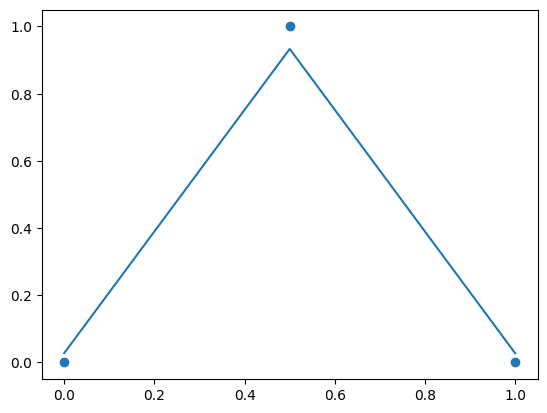

In [ ]:
# plt.plot(inputs, y_activation_node1)
# plt.plot(inputs, scale_node1)
# plt.plot(inputs, y_activation_node2)
# plt.plot(inputs, scale_node2)
# plt.plot(inputs, sum_both_y)
plt.plot(inputs, final_op)
plt.scatter([0.0,0.5,1],[0,1,0])

In [ ]:
print("w3 -> ", w3)
print("w4 -> ", w4)
print("b3 -> ", b3)

w3 ->  -1.1012000000000004
w4 ->  -2.085699999999999
b3 ->  2.3880999999999966


# 🎉 Finally fit the last 3 parameters using GD 🚀



# Now for rest of the parametsrs 🔥🔥

Calculate all derivatives of the `SSR` wrt `w1`, `w2`, `b1`, and `b2`

# Der of w1, w2, b1, and b2 👇

Using a STd Normal Dist is one of the many way to initialize parameters

In [ ]:
def der_of_ssr_w1(actual, predicted, x_1):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(w3)*(e**x_1[i]/(1 + e**x_1[i]))*inputs[i]) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans


def der_of_ssr_b1(actual, predicted, x_1):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(w3)*(e**x_1[i]/(1 + e**x_1[i]))*1) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans

# x_2 = list of bottom node x axis vals of AF
def der_of_ssr_w2(actual, predicted, x_2):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(w4)*(e**x_2[i]/(1 + e**x_2[i]))*inputs[i]) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans


def der_of_ssr_b2(actual, predicted, x_2):
  # both are list
  der_list = [ (-2*(actual[i]-predicted[i])*(w4)*(e**x_2[i]/(1 + e**x_2[i]))*1) for i in range(0,len(predicted))]
  ans = sum(der_list)
  return ans

In [ ]:
# Initialize
learning_rate = 0.1
w1 = 2.74
b1 = 0

w2 = -1.13
b2 = 0

w3 = 0.36
w4 = 0.63
b3 = 0

In [ ]:
for g in range(0,450):
  old_w1 = w1
  old_w2 = w2
  old_b1 = b1
  old_b2 = b2
  old_b3 = b3
  old_w3 = w3
  old_w4 = w4

  ## This time we need this block calculating each time

  x_1 = [connection(i) for i in inputs]
  y_activation_node1 = [sfActiv(connection(i)) for i in inputs]
  scale_node1 = [i*w3 for i in y_activation_node1]

  x_2 = [connection2(i) for i in inputs]
  y_activation_node2 = [sfActiv2(connection2(i)) for i in inputs]
  scale_node2 = [i*w4 for i in y_activation_node2]

  sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]

  predicted = [sum_both_y[l]+b3 for l in range(0,len(sum_both_y))]
  # print(predicted)
  # print(actual)
  # print(sum_both_y)
  # print(b3)

  # diraction_of_curve = der_of_ssr_b3(actual, predicted) # gives slope of curve
  # ssr = ssr_b3(actual, predicted)

  ## Gradient decent
  # step_size = diraction_of_curve*learning_rate # slope * learning rate
  # b3 = old_b3-step_size   # old_value - step size

  # w1
  d_w1 = round(der_of_ssr_w1(actual, predicted, x_1), 2) # derivative w1
  step_size_w1 = d_w1*learning_rate
  w1 = old_w1 - step_size_w1

  # b1
  d_b1 = round(der_of_ssr_b1(actual, predicted, x_1), 2) # derivative b1
  step_size_b1 = d_b1*learning_rate
  b1 = old_b1 - step_size_b1

  # w2
  d_w2 = round(der_of_ssr_w2(actual, predicted, x_2), 2) # derivative w2
  step_size_w2 = d_w2*learning_rate
  w2 = old_w2 - step_size_w2

  # b2
  d_b2 = round(der_of_ssr_b2(actual, predicted, x_2), 2) # derivative b2
  step_size_b2 = d_b2*learning_rate
  b2 = old_b2 - step_size_b2

  # w3
  d_w3 = round(der_of_ssr_w3(actual, predicted, y_activation_node1), 2) # derivative w3
  step_size_w3 = d_w3*learning_rate
  w3 = old_w3 - step_size_w3

  # w4
  d_w4 = round(der_of_ssr_w4(actual, predicted, y_activation_node2), 2) # derivative w4
  step_size_w4 = d_w4*learning_rate
  w4 = old_w4 - step_size_w4

  # b3
  d_b3 = round(der_of_ssr_b3(actual, predicted), 2) # derivative b3
  step_size_b3 = d_b3*learning_rate
  b3 = b3 - step_size_b3

  print(f"Old values: w1 = {old_w1}, b1 = {old_b1}, w2 = {old_w2}, b2 = {old_b2}, w3 = {old_w3}, w4 = {old_w4}, b3 = {old_b3} ")
  print(f"derivative values: w1 = {d_w1}, b1 = {d_b1}, w2 = {d_w2}, b2 = {d_b2}, w3 = {d_w3}, w4 = {d_w4}, b3 = {d_b3} ")
  print(f"New values: w1 = {w1}, b1 = {b1}, w2 = {w2}, b2 = {b2}, w3 = {w3}, w4 = {w4}, b3 = {b3}")

  print("------------")



Old values: w1 = 2.74, b1 = 0, w2 = -1.13, b2 = 0, w3 = 0.36, w4 = 0.63, b3 = 0 
derivative values: w1 = 0.76, b1 = 0.97, w2 = 0.33, b2 = 0.73, w3 = 7.14, w4 = 1.49, b3 = 3.46 
New values: w1 = 2.664, b1 = -0.097, w2 = -1.1629999999999998, b2 = -0.073, w3 = -0.354, w4 = 0.481, b3 = -0.34600000000000003
------------
Old values: w1 = 2.664, b1 = -0.097, w2 = -1.1629999999999998, b2 = -0.073, w3 = -0.354, w4 = 0.481, b3 = -0.34600000000000003 
derivative values: w1 = 1.22, b1 = 1.77, w2 = -0.53, b2 = -0.92, w3 = -11.44, w4 = -2.33, b3 = -6.18 
New values: w1 = 2.5420000000000003, b1 = -0.274, w2 = -1.1099999999999999, b2 = 0.019000000000000017, w3 = 0.7899999999999999, w4 = 0.714, b3 = 0.27199999999999996
------------
Old values: w1 = 2.5420000000000003, b1 = -0.274, w2 = -1.1099999999999999, b2 = 0.019000000000000017, w3 = 0.7899999999999999, w4 = 0.714, b3 = 0.27199999999999996 
derivative values: w1 = 3.73, b1 = 4.93, w2 = 1.01, b2 = 2.06, w3 = 14.16, w4 = 3.66, b3 = 8.41 
New values: 

In [ ]:
scale_node1 = [i*w3 for i in y_activation_node1]

scale_node2 = [i*w4 for i in y_activation_node2]

sum_both_y = [scale_node1[i]+scale_node2[i] for i in range(0,len(scale_node1))]

final_op = [sum_both_y[l]+(b3) for l in range(0,len(sum_both_y))]

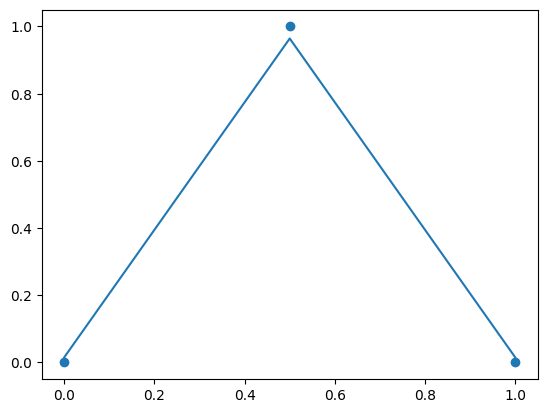

In [ ]:
# plt.plot(inputs, y_activation_node1)
# plt.plot(inputs, scale_node1)
# plt.plot(inputs, y_activation_node2)
# plt.plot(inputs, scale_node2)
# plt.plot(inputs, sum_both_y)
plt.plot(inputs, final_op)
plt.scatter([0.0,0.5,1],[0,1,0])